In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

In [ ]:
%cd drive/MyDrive/datas/PetImages/

In [ ]:
%ls

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from warnings import filterwarnings
filterwarnings('ignore') 
from PIL import Image
import os
import cv2
from google.colab.patches import cv2_imshow
from pathlib import Path
import tensorflow as tf 
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
import matplotlib.image as mpimg

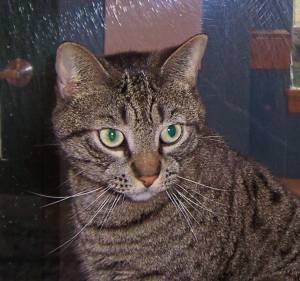

In [ ]:
catImage = cv2.imread('Train/Cat/1.jpg')
cv2_imshow(catImage)

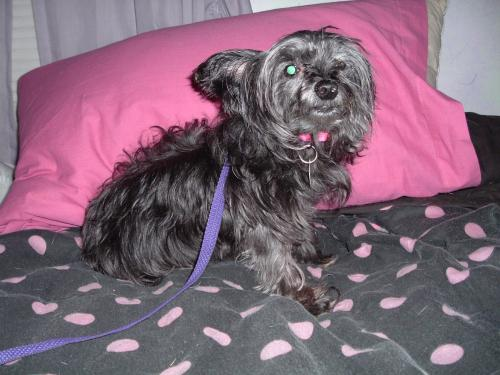

In [ ]:
dogImage = cv2.imread("Train/Dog/0.jpg")
cv2_imshow(dogImage)

In [ ]:
def imgFolderChange():
    destination_path = 'Train/Dog'
    target_path = 'Test/Dog'

    format_of_your_images = 'jpg'

    all_the_files = Path(destination_path).rglob(f'*.{format_of_your_images}')
    count = 0
    for f in all_the_files:
        p = cv2.imread(str(f))
        if p is not None:
          cv2.imwrite(f'{target_path}/{f.name}', p)
          count += 1
          if count == 3750:
            break

imgFolderChange()

Data Train-Test olarak ayrıldı.

In [ ]:
len(os.listdir("Train/Dog"))

12499

In [ ]:
len(os.listdir("Test/Dog"))

3754

In [ ]:
classifier = Sequential()
classifier.add(Conv2D(128,(3,3), input_shape=(64,64,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2)) #if stride not given it equal to pool filter size
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2))
classifier.add(Conv2D(32,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2))
classifier.add(Conv2D(16,(3,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2))
classifier.add(Flatten())
classifier.add(Dense(units=1,activation='sigmoid'))
adam = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
classifier.compile(optimizer="rmsprop",loss='binary_crossentropy',metrics=['accuracy'])

NameError: ignored

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

#Training Set
train_set = train_datagen.flow_from_directory('Train',
                                             target_size=(64,64),
                                             batch_size=32,
                                             class_mode='binary')
#Validation Set
test_set = test_datagen.flow_from_directory('Test',
                                           target_size=(64,64),
                                           batch_size = 32,
                                           class_mode='binary',
                                           shuffle=False)


In [ ]:
from PIL import UnidentifiedImageError
from PIL import Image
# classifier.fit_generator sonra "PIL.UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7f4b95e7f950>" gelen bozuk image hatasindan sonra yapilmistir.
def errorImage(path):
  path = Path(path).rglob("*.jpg")
  for img_p in path:
      try:
          img = Image.open(img_p)
          #print(img)
      except UnidentifiedImageError:
          return img_p
print("Train Dog Error Images: {}\nTrain Cat Error Image: {}\nTest Dog Error Image: {}\nTest Cat Error Image: {}".format(errorImage("Train/Dog"),
                                                                                                                         errorImage("Train/Cat"),
                                                                                                                         errorImage("Test/Dog"),
                                                                                                                         errorImage("Test/Cat")))

In [ ]:
#for file in os.listdir('Train/Dog/'): 
 #   os.remove("11702.jpg")
#for file in os.listdir('Train/Cat/'): 
 #   os.remove("Train/Cat/666.jpg")
len(os.listdir("Train/Dog"))

12499

In [ ]:
%%capture
model = classifier.fit_generator(train_set,
                        steps_per_epoch=10,  # steps_per_epoch = TotalTrainingSamples / TrainingBatchSize
                        epochs = 200,  # each training
                        validation_data = test_set, 
                        validation_steps = 10 # validation_steps = TotalvalidationSamples / ValidationBatchSize
                        batch_size = 64
                        )

In [ ]:
loss_train = model.history['train_loss']
loss_val = model.history['val_loss']
epochs = range(1,35)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()  

In [ ]:
model

In [ ]:
pred = classifier.predict_generator(test_set,verbose=1)
pred[pred > .5] = 1
pred[pred <= .5] = 0
test_labels = []
for i in range(0,len(test_set)):
    test_labels.extend(np.array(test_set[i][1]))

print("test_labels: ",test_labels)

235/235 [==============================] - 47s 200ms/step
test_labels:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

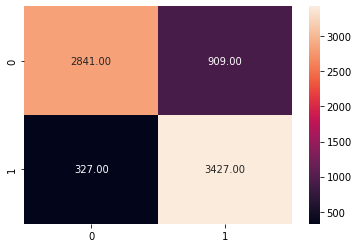

In [ ]:
fileNames = test_set.filenames
result = pd.DataFrame() 
result["fileNames"] = fileNames
result["predicts"] = pred
result["test"] = test_labels

cm = confusion_matrix(test_labels,pred)
sns.heatmap(cm, annot = True, fmt = ".2f")

In [ ]:
%cd ..
%ls

/content/drive/MyDrive
'Colab Notebooks'/   datas/   models/


In [ ]:
from tensorflow.keras.models import load_model
classifier.save('models/cat_dog_model.h5')
classifier = load_model('models/cat_dog_model.h5')

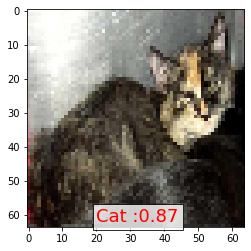

In [ ]:
#Prediction of image
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img1 = image.load_img('Test/Cat/642.jpg', target_size=(64, 64))
img = image.img_to_array(img1)
img = img/255
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
prediction = classifier.predict(img, batch_size=None,steps=1) #gives all class prob.
if(prediction[:,:]>0.5):
    value ='Dog :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='Cat :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

plt.imshow(img1)
plt.show()

In [ ]:
import pandas as pd
test_set.reset
ytesthat = classifier.predict_generator(test_set)
df = pd.DataFrame({
    'filename':test_set.filenames,
    'predict':ytesthat[:,0],
    'y':test_set.classes
})

In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)
df.head(10)

,filename,predict,y,y_pred
0,Cat/6389.jpg,0.85840,0,1
1,Cat/639.jpg,0.25571,0,0
2,Cat/6390.jpg,0.71086,0,1
3,Cat/6391.jpg,0.44213,0,0
4,Cat/6392.jpg,0.54511,0,1
5,Cat/6393.jpg,0.15946,0,0
6,Cat/6394.jpg,0.13926,0,0
7,Cat/6395.jpg,0.14008,0,0
8,Cat/6396.jpg,0.72514,0,1
9,Cat/6397.jpg,0.57481,0,1


In [ ]:
misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image from 5000 Validation images : %d'%misclassified['y'].count())

Total misclassified image from 5000 Validation images : 1236


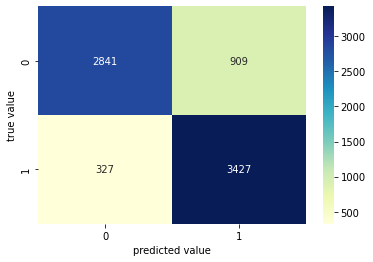

In [ ]:
#Prediction of test set
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g');
plt.xlabel('predicted value')
plt.ylabel('true value');

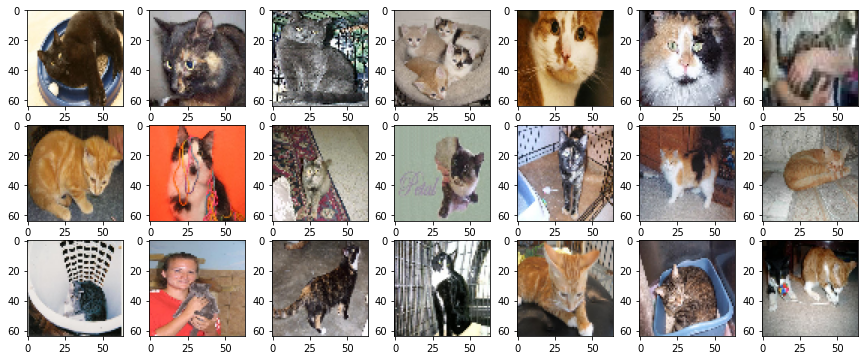

In [ ]:
#Some of Cat image misclassified as Dog.
import matplotlib.image as mpimg

CatasDog = df['filename'][(df.y==0)&(df.y_pred==1)]
fig=plt.figure(figsize=(15, 6))
columns = 7
rows = 3
for i in range(columns*rows):
    #img = mpimg.imread()
    img = image.load_img('Test/'+CatasDog.iloc[i], target_size=(64, 64))
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)

plt.show()

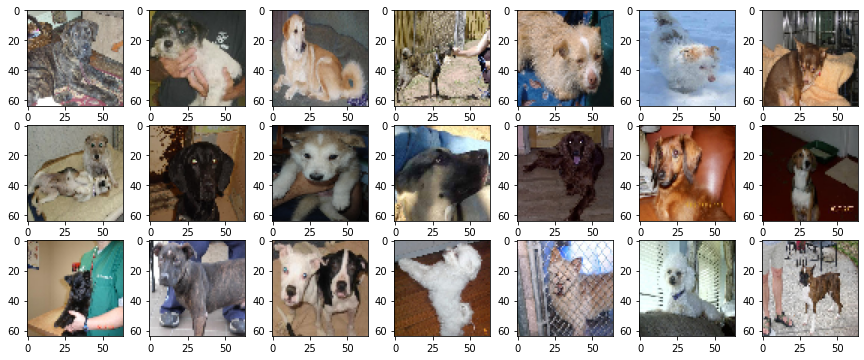

In [ ]:
#Some of Dog image misclassified as Cat.
import matplotlib.image as mpimg

DogasCat = df['filename'][(df.y==1)&(df.y_pred==0)]
fig=plt.figure(figsize=(15, 6))
columns = 7
rows = 3
for i in range(columns*rows):
    #img = mpimg.imread()
    img = image.load_img('Test/'+DogasCat.iloc[i], target_size=(64, 64))
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)
plt.show()

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

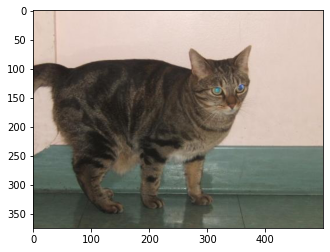

In [ ]:
#Input Image for Layer visualization
img1 = image.load_img('Test/Cat/639.jpg')
plt.imshow(img1);
#preprocess image
img1 = image.load_img('Test/Cat/639.jpg', target_size=(64, 64))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

In [ ]:
model_layers = [ layer.name for layer in classifier.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'flatten', 'dense', 'dense_1']


In [ ]:
from tensorflow.keras.models import Model
conv2d_output = Model(inputs=classifier.input, outputs=classifier.get_layer('conv2d').output)
conv2d_1_output = Model(inputs=classifier.input,outputs=classifier.get_layer('conv2d_1').output)

In [ ]:
conv2d_features = conv2d_output.predict(img)
conv2d_1_features = conv2d_1_output.predict(img)
print('First conv layer feature output shape : ',conv2d_features.shape)
print('First conv layer feature output shape : ',conv2d_1_features.shape)

First conv layer feature output shape :  (1, 62, 62, 32)
First conv layer feature output shape :  (1, 29, 29, 32)


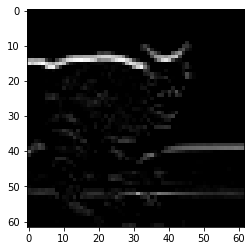

In [ ]:
plt.imshow(conv2d_features[0, :, :, 4], cmap='gray')

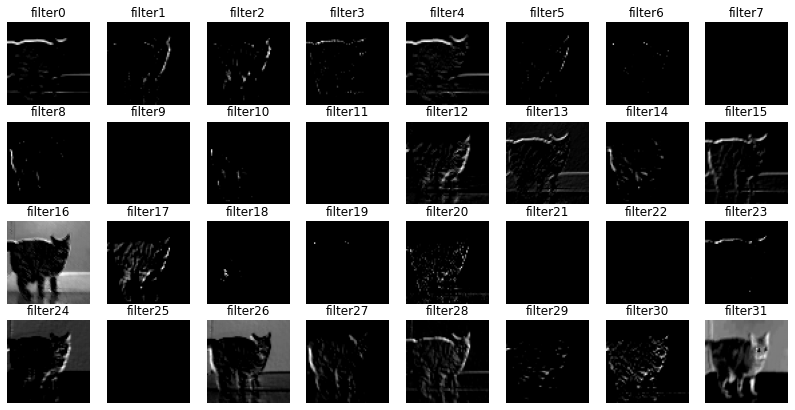

In [ ]:
fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_features[0, :, :, i], cmap='gray')
plt.show()

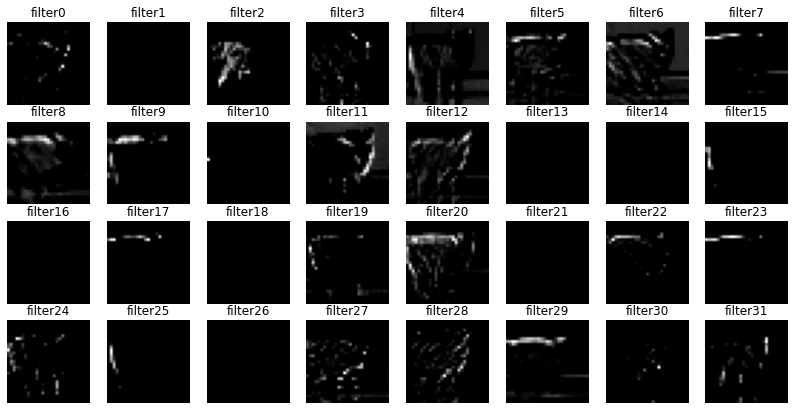

In [ ]:
fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_1_features[0, :, :, i], cmap='gray')
plt.show()

In [ ]:
%%capture
# Model Accuracy
x1 = classifier.evaluate_generator(train_set)
x2 = classifier.evaluate_generator(test_set)
print('Training Accuracy  : %1.2f%%     Training loss  : %1.6f'%(x1[1]*100,x1[0]))
print('Validation Accuracy: %1.2f%%     Validation loss: %1.6f'%(x2[1]*100,x2[0]))

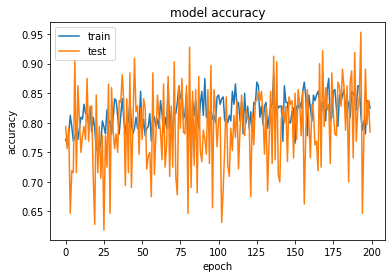

In [ ]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()